In [ ]:

#read in data


## rotation

In [4]:
import numpy as np
import io
import matplotlib.pyplot as plt
PATH = "E:/LION/HyperSight/data/rotation_gyro/"

error_5 = []
error_10 = []
error_15 = []
error_20 = []
error_list = [error_5,error_10,error_15,error_20]
degree_list = [5,10,15,20]
result_list = []
for degree in range(4):
    curr_degree = degree_list[degree]
    print(curr_degree)
    for name in range(10):
        data = []
        with open(PATH+str(curr_degree)+"/"+str(name)+".txt","r") as file:
            for line in file:
                if line == '\n':continue
                temp = line.lstrip().replace('\t',' ').split()
                for _ in [float(i) for i in temp]:
                    data.append(_)
        data= np.array(data)
        data = data.reshape(-1,6)
    # idx=0
    # for i in data:
    #     if(i[2]==6):
    #         idx+=1
    # print(idx)
        data = data[:,5]
        res = 0.0
#         plt.figure()
#         plt.plot(data)
        w = []# integrated degree list
        temp = 0
        for a in data:
            temp += a/199
            w.append(temp)
#         plt.plot(w)
#         plt.show()
        
        res = temp*180/np.pi
        result_list.append(np.abs(res))
        error_list[degree].append(curr_degree-np.abs(res))

5
10
15
20


In [141]:
for i in range(4):
    print(error_list[i])

[-0.9257364749826742, -1.160689502061385, -0.9244096938052087, -1.0066696275276925, -0.683973873300709, 1.100983689537482, 0.7396709182228811, 0.9227568061803, 0.8905188601095269, 0.9660131231994873]
[-0.6018374565978757, -0.8779468070425906, 0.8373420105105893, 0.9172910164843877, -0.655189571062051, -0.8160102053440781, 0.8038212313422406, 1.0785246939103175, -0.9724903590088942, -0.7125307431708681]
[-0.6099128348863676, -0.9512712865220685, 1.0373854473191582, 1.194946340523213, -0.42389230337086836, -1.091179935223611, 0.8255235595244521, 1.0120185471402916, -0.5219855862194969, -0.5833422353446984]
[-0.39698828715113876, 1.040170293176061, -0.6033058407566507, 1.3464439135735198, -0.5980163395664064, 1.3050942848140004, -0.4075585344486079, 1.3244247711550514, -0.3431441545377112, 1.583479337302954]


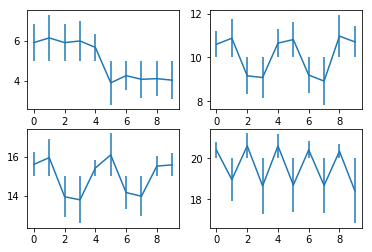

In [164]:


x = np.arange(10)
fig = plt.figure()

for i in range(4):
    
    ax1=plt.subplot(2, 2, i+1)
    plt.errorbar(x, result_list[i*10:10+i*10], yerr=error_list[i], label='both limits (default)')

In [158]:
len(result_list[0:10])

10

{'whiskers': [<matplotlib.lines.Line2D at 0x22e99f2be80>,
 'caps': [<matplotlib.lines.Line2D at 0x22e99f367f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e99f2bd30>,
 'medians': [<matplotlib.lines.Line2D at 0x22e99f36e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x22e99f36f60>,
 'means': []}

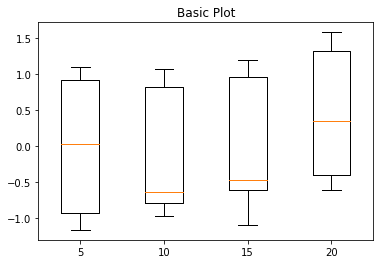

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([error_list[0],error_list[1],error_list[2],error_list[3]],labels=[5,10,15,20])